In [82]:
import os 
import csv
import networkx as nx
g = nx.MultiGraph()

transactionCount = 0
path = os.getcwd() + "/random_data_2.csv"
with open(path, encoding='utf-8-sig') as file:
    data = csv.DictReader(file)
    for row in data:
        # print(row)
        transactionCount += 1

        # Weaver_id,Role,Quantity,Type,Category,border,color,season,Centre,Rating    -    Column headers
        s = row['Type'] + "*" + row['Category'] + "*" + row['border'] + "*" + row['color']

        try:
            # Check if product node G[s] already exists.If yes, proceed otherwise go to except block
            g[s]
            # If yes, increment stock by the quantity that the weaver sold to company
            g.nodes[s]['Stock'] += int(row['Quantity'])

        except:
            # Key error which means product node G[s] couldn't be found
            g.add_node(s, Stock=int(row['Quantity']))
            g.add_edges_from([(s,row['Type']),(s,row['Category']),(s,row['border']),(s,row['color'])])

        # Link weaver with product with details of product as edge attributes
        g.add_edge(row['Weaver_id'], s, w_id=row['Weaver_id'] ,quantity=row['Quantity'], month=row['season'], centre=row['Centre'], rating=row['Rating'])
        g.add_edge(row['season'], s, w_id=row['Weaver_id'] ,quantity=row['Quantity'], month=row['season'], centre=row['Centre'], rating=row['Rating'])
        # g.add_edge(row['Centre'], s, w_id=row['Weaver_id'] ,quantity=row['Quantity'], month=row['season'], centre=row['Centre'], rating=row['Rating'])
        # g.add_edge(row['Rating'], s, w_id=row['Weaver_id'] ,quantity=row['Quantity'], month=row['season'], centre=row['Centre'], rating=row['Rating'])

# print(transactionCount)
# print(g['Accessories'])
# print("sds")
# print(g.nodes[s])
# nx.draw(g, with_labels=True)

In [83]:
# Using pickle to store the graph and can be later loaded into another variable 'g'
import pickle, os
path = os.getcwd() + "/Graph1.txt"
# Uncomment below line to store graph
pickle.dump(g, open(path, 'wb'))

In [84]:
# By loading the graph, we may only add new transactions to existing graph
# Uncomment below line to load teh graph
g = pickle.load(open(path,'rb'))

# Find the current stock of any product available with the company

In [85]:
# Find the current stock of any product available with the company

def findStock(ty="",cat="",bor="",col=""):
    if ty=="" and cat=="" and bor=="" and col=="":
        print("Atleast one attribute/filter must be specified")
    else:
        count = 0

        
        if ty!="":
            d = g[ty]
        elif cat!="":
            d = g[cat]
        elif bor!="":
            d = g[bor]
        else:
            d = g[col]

        for i in d.keys():
            if str(i).find(ty) != -1 and str(i).find(cat) != -1 and str(i).find(bor) != -1 and str(i).find(col) != -1:
                count += g.nodes[i]['Stock']
                # print(i)
                # print(g[i])
        print(count)

# Pass the category, type, border and color to this function to get back the available stock for that product

# findStock(type, category, border, color)
findStock("Accessories","Bermuda","Golden-Zari","Red")

1808


In [21]:
# To verify that the above query is answered correctly, we can verify using the following code which performs a linear search
# over all records and returns the stock by summing up the quantity of that transaction

with open('random_data_2.csv', encoding='utf-8-sig') as file:
    c = 0
    data = csv.DictReader(file)
    for row in data:
        if row['Category'] == "Bluse" and row['Type'] == "Bagru" and row['border'] == "Floral" and row['color'] == "Green":
            c += int(row['Quantity'])
print(c)

16324


# List all transactions made between a particular weaver and the company.

{0: {'w_id': '2200003', 'quantity': '5', 'month': 'April', 'centre': 'Mumbai', 'rating': '4s'}}
{0: {'w_id': '2200003', 'quantity': '7', 'month': 'October', 'centre': 'Mumbai', 'rating': '5s'}}
{0: {'w_id': '2200003', 'quantity': '7', 'month': 'November', 'centre': 'Hyderabad', 'rating': '2s'}}
{0: {'w_id': '2200003', 'quantity': '6', 'month': 'October', 'centre': 'Mumbai', 'rating': '2s'}}
{0: {'w_id': '2200003', 'quantity': '2', 'month': 'March', 'centre': 'Hyderabad', 'rating': '3s'}}
{0: {'w_id': '2200003', 'quantity': '10', 'month': 'November', 'centre': 'Hyderabad', 'rating': '4s'}}
{0: {'w_id': '2200003', 'quantity': '10', 'month': 'September', 'centre': 'Hyderabad', 'rating': '2s'}}
Number of transactions made by weaver with id 2200003 is :  7


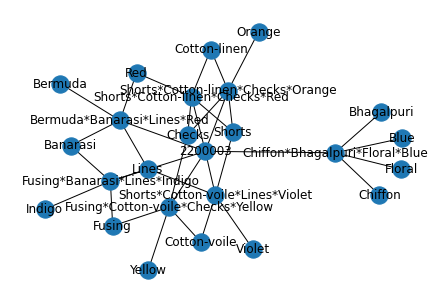

In [22]:
# List all transactions made between a particular weaver and the company.
P = nx.MultiGraph()
def a(id):
    count = 0
    for i in g[id].keys():
        count += 1
        print(g[id][i])
        l = str(i).split("*")
        P.add_edges_from([(id,i),(i,l[0]),(i,l[1]),(i,l[2]),(i,l[3])])
    print("Number of transactions made by weaver with id",id,"is : ",count)

# Pass any weaver id to get the list of transactions between them and the company        
a("2200003")

# Plots the subgraph used to answer this query
nx.draw(P,with_labels=True)


# Fetch transaction details based on month / center / rating of product.

In [87]:
def transactions(months, centres, ratings, wids):
    count = 0

    if wids:
        print("Yess")
        for wid in wids:
            for pdt in g[wid].keys():
                for index in g[wid][pdt].keys():
                    transaction = g[wid][pdt][index]
                    if transaction['month'] in months and transaction['centre'] in centres and transaction['rating'] in ratings:
                        print(transaction)
                        count += 1

    else:
        print("NO")
        for mon in months:
            print(mon)
            for pdt in g[mon].keys():
                for index in g[mon][pdt].keys():
                    transaction = g[mon][pdt][index]
                    if transaction['centre'] in centres and transaction['rating'] in ratings:
                        print(transaction)
                        count += 1

    print(count)

    
transactions(["September", "April", "October"],['Mumbai', 'Hyderabad'],['4s','5s'],[])
# 141


NO
September
{'w_id': '2294524', 'quantity': '5', 'month': 'September', 'centre': 'Mumbai', 'rating': '4s'}
{'w_id': '2274795', 'quantity': '7', 'month': 'September', 'centre': 'Mumbai', 'rating': '4s'}
{'w_id': '2224573', 'quantity': '2', 'month': 'September', 'centre': 'Mumbai', 'rating': '4s'}
{'w_id': '2286842', 'quantity': '4', 'month': 'September', 'centre': 'Hyderabad', 'rating': '5s'}
{'w_id': '2278641', 'quantity': '5', 'month': 'September', 'centre': 'Hyderabad', 'rating': '4s'}
{'w_id': '2201858', 'quantity': '1', 'month': 'September', 'centre': 'Mumbai', 'rating': '5s'}
{'w_id': '2285582', 'quantity': '10', 'month': 'September', 'centre': 'Mumbai', 'rating': '4s'}
{'w_id': '2256574', 'quantity': '7', 'month': 'September', 'centre': 'Mumbai', 'rating': '4s'}
{'w_id': '2215404', 'quantity': '3', 'month': 'September', 'centre': 'Hyderabad', 'rating': '4s'}
{'w_id': '2241019', 'quantity': '10', 'month': 'September', 'centre': 'Mumbai', 'rating': '4s'}
{'w_id': '2201971', 'quant